#### Importing the Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')

## 1. Read the dataset to the python environment

In [2]:
data_iris = pd.read_excel("iris.xls")
data_iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Calculating the mean of each column of the dataset.


In [3]:
np.mean(data_iris,axis=0)

SL    5.855944
SW    3.049306
PL    3.756250
PW    1.198667
dtype: float64

In [4]:
np.min(data_iris,axis=0)

SL                        4.3
SW                        2.0
PL                        1.0
PW                        0.1
Classification    Iris-setosa
dtype: object

In [5]:
np.max(data_iris,axis=0)


SL                           7.9
SW                           4.4
PL                           6.9
PW                           2.5
Classification    Iris-virginica
dtype: object

In [6]:
data_iris.shape


(150, 5)

#### Checking for the null values present in the dataset


In [7]:
data_iris.isna().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in the dataset.


#### Checking the balance of values between different Classifications


In [8]:
data_iris['Classification'].value_counts()


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

In [9]:
data_iris[data_iris.duplicated()]


,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are duplicate value in the data set iris but as seen above each classification has 50 entries each so the dataset is well balanced.

#### Data Visualizations


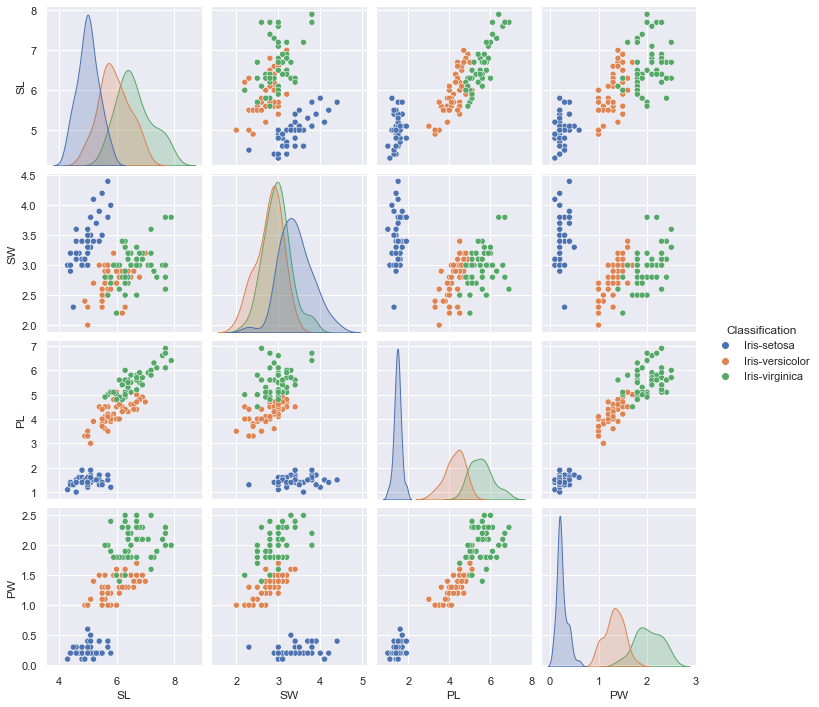

In [10]:
sns.pairplot(data_iris,hue='Classification')

## 2. Do necessary Pre-processing Steps:


In [12]:
# checking missing values

data_iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data_iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

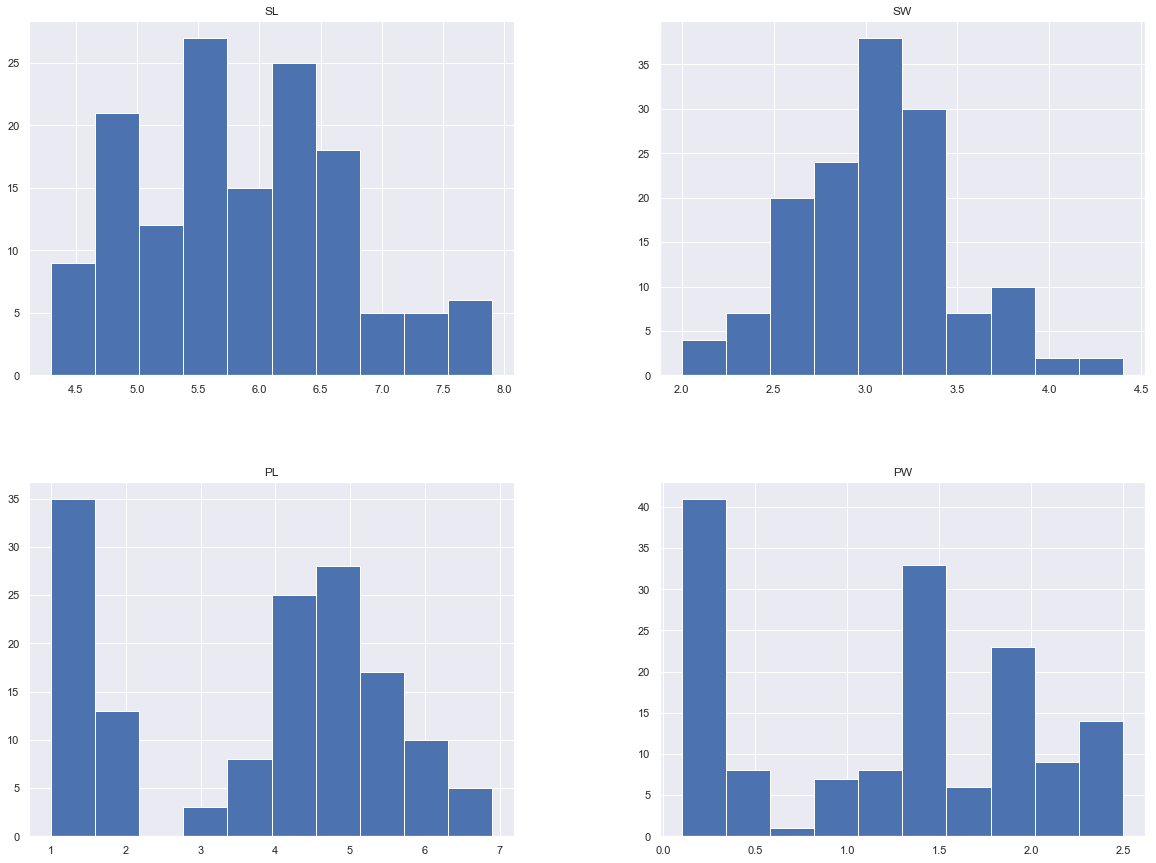

In [14]:
freqgraph=data_iris.select_dtypes(include="float")
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
# handling missing values


In [15]:
data_iris['SL'] = data_iris['SL'].fillna(data_iris['PL'].mean())
data_iris['SW'] = data_iris['SW'].fillna(data_iris['PL'].mean())
data_iris['PL'] = data_iris['PL'].fillna(data_iris['PL'].mean())

In [16]:
data_iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

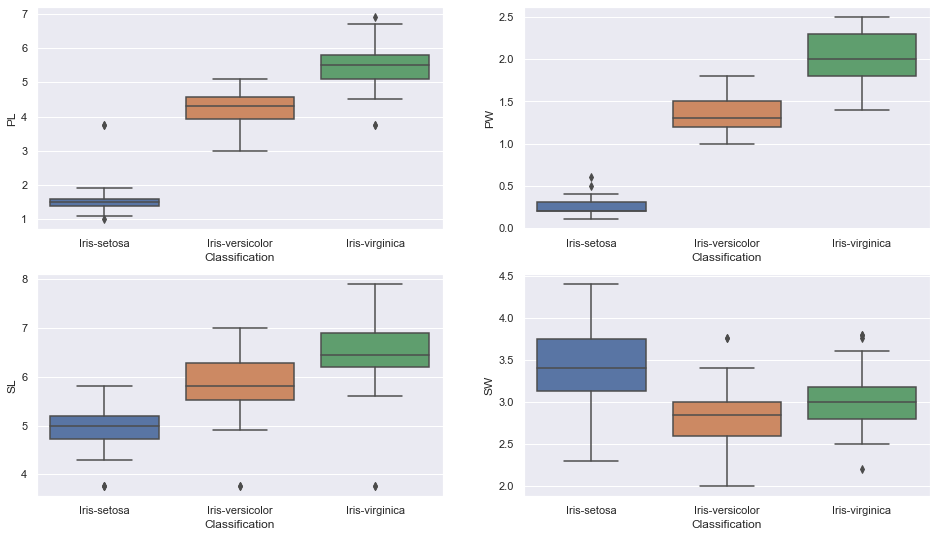

In [17]:
# handling outliers
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=data_iris['PL'], x= 'Classification', data=data_iris, orient='v' , ax=axes[0, 0])
sns.boxplot( y=data_iris['PW'], x= 'Classification', data=data_iris, orient='v' , ax=axes[0, 1])
sns.boxplot( y=data_iris['SL'], x= 'Classification', data=data_iris, orient='v' , ax=axes[1, 0])
sns.boxplot( y=data_iris['SW'], x= 'Classification', data=data_iris, orient='v' , ax=axes[1, 1])
plt.show()

In [19]:
#removing outliers
for column in data_iris.columns[0:4]:
    for classification in data_iris["Classification"].unique():
        class_type = data_iris[data_iris["Classification"] == classification]
        Selected_column = class_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        data_iris.drop(index = outlierss, inplace=True) # droppi

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([117, 119, 124, 131], dtype='int64')
Int64Index([13, 24, 44], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([118], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [20]:
# Label Encoding
data_iris.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data_iris['Classification'] = label_en.fit_transform(data_iris['Classification'])

In [24]:
data_iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

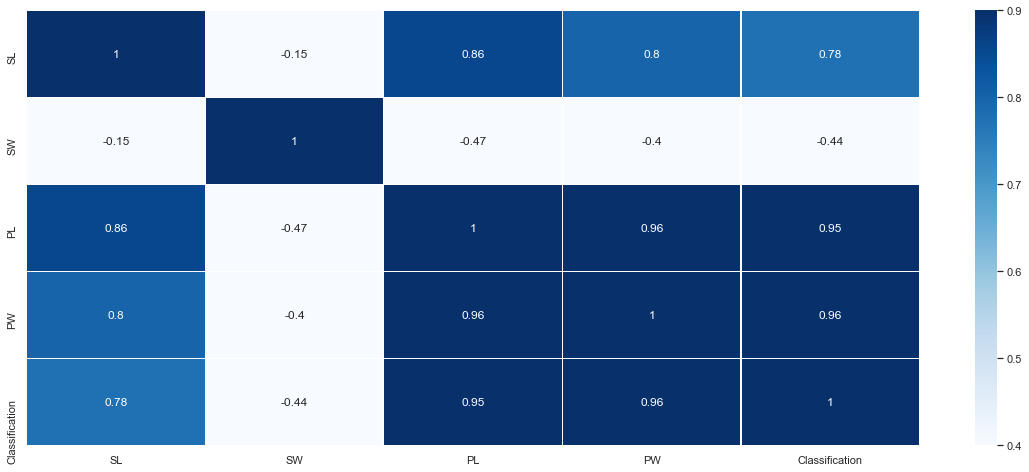

In [25]:
corrmatrix = data_iris.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='Blues')

In [26]:
data_iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [27]:
y = data_iris['Classification']
x = data_iris.drop('Classification',axis=1)

In [28]:
#Feature Engineering
x['mean'] = x[['SW', 'SL', 'PW', 'PL']].mean(axis = 1)
x['sum'] = x[['SW', 'SL', 'PW', 'PL']].sum(axis = 1)
x['skew'] = x[['SW', 'SL', 'PW', 'PL']].skew(axis = 1)
x['kurt'] = x[['SW', 'SL', 'PW', 'PL']].kurt(axis = 1)

In [29]:
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'mean', 'sum', 'skew', 'kurt'], dtype='object')

In [30]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).

In [32]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [35]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [37]:
#Building KNN Model
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred =  classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [38]:
acc_values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'Accuracy')

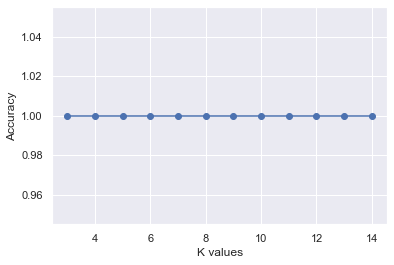

In [39]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [40]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)

In [41]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [43]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [44]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.7368421052631579
Precision is:  0.7368421052631579
Recall is:  0.7368421052631579
F1 score is:  0.7368421052631579


In [45]:
confusion_matrix(y_test,y_pred)


array([[ 9,  9,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [46]:
#Building SVM(Linear Kernel) Model

from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)


In [47]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [48]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
#Building SVM(Polynomial Kernel) Model

svm_poly = SVC(kernel = 'poly', degree = 3)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)

In [50]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.5
Precision is:  0.5
Recall is:  0.5
F1 score is:  0.5


In [51]:
confusion_matrix(y_test,y_pred)

array([[ 0, 18,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [ ]:
#Building SVM(Radial Basis Function Kernel) Model




In [52]:
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(x_train,y_train)
y_pred = svm_radial.predict(x_test)

In [53]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [54]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [56]:
#Building Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [57]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.8421052631578947
Precision is:  0.8421052631578947
Recall is:  0.8421052631578947
F1 score is:  0.8421052631578947


In [58]:
confusion_matrix (y_test, y_pred)

array([[12,  6,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [59]:
#Feature Importance
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)*100

PW      30.223764
PL      17.349597
sum     16.368946
kurt    13.556327
mean    12.816591
SL       6.593058
SW       1.814529
skew     1.277188
dtype: float64

While comparing the f1 scores of the SVM algorithm with Radial Basis Function kernel lead to neither overfitting nor underfitting model for the classification of species of the iris flower according to the given dataset. In the logistic regression algorithm model the predictions were overfitting. The least fitted among the tested algorithms was the KNN Algorithm.